In [3]:
#data challenge Honk 4 honda
#come up with a presentation to understand demand of hondas in Omaha NE, find other market opportunities

#import data

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib

df_craigslist_vehicles = pd.read_csv("/Users/meghan/Desktop/INSIGHT/craigslistVehicles.csv")
df_craigslist_vehicles_full = pd.read_csv("/Users/meghan/Desktop/INSIGHT/craigslistVehiclesFull.csv")


In [53]:
#clean data structures
#remove city_url, VIN, image_url, desc from craigslist_vehicles
#remove url, image_url, county_fips, state_fips, state_name

df_craigslist_vehicles_clean = df_craigslist_vehicles.drop(['url', 'city_url', 'VIN', 'image_url', 'desc'], axis=1)

df_craigslist_vehicles_full_clean = df_craigslist_vehicles_full.drop(['url', 'image_url', 'vin', 'county_fips', 'state_fips', 'state_name'], axis=1)


          city  price    year   manufacturer                          make  \
9012     omaha  17988  2013.0  mercedes-benz            c-class c300 4mati   
9013     omaha  15988  2013.0          dodge    journey r/t all wheel driv   
9014     omaha  15988  2012.0          buick    enclave 1 owner awd heated   
9015     omaha  15988  2012.0          buick    enclave auto 3.6l v6 awd s   
9021     omaha  17988  2010.0            gmc  sierra 1500 sle ext. cab aut   
...        ...    ...     ...            ...                           ...   
1339542  omaha  32900  2018.0           ford             edge titanium awd   
1339543  omaha   9500  2008.0          chevy                     silverado   
1339544  omaha  13499  2014.0         subaru                      forester   
1339545  omaha   6850  2002.0          chevy                silverado 1500   
1339546  omaha   9995  2000.0      chevrolet                      corvette   

         condition    cylinders fuel  odometer title_status tra

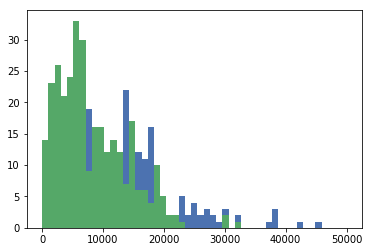

In [108]:
#look at what is going on with omaha vs. others
#begin by sorting out omaha vehicles (6940 of them)

df_craigslist_omaha= df_craigslist_vehicles_full_clean[(df_craigslist_vehicles_full_clean.city=='omaha') & (df_craigslist_vehicles_full_clean.state_code=='NE')]
print(df_craigslist_omaha)
#df for honda

df_craigslist_omaha_honda = df_craigslist_omaha[df_craigslist_omaha.manufacturer=='honda']
print(df_craigslist_omaha_honda)
#make equal sized dataframe of other competitors

df_craigslist_omaha_not_honda = df_craigslist_omaha[df_craigslist_omaha.manufacturer!='honda'].sample(n=313)

#check for sig with features #price
plt.style.use('seaborn-deep')
bins = np.linspace(0, 50000, 50)
plt.hist(df_craigslist_omaha_not_honda['price'], bins, label='not honda')
plt.hist(df_craigslist_omaha_honda['price'], bins, label='honda')
plt.show()

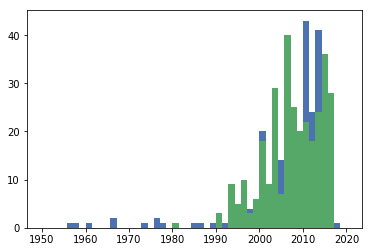

In [97]:
#check for sig with features #year
plt.style.use('seaborn-deep')
bins = np.linspace(1950, 2020, 50)
plt.hist(df_craigslist_omaha_not_honda['year'], bins, label='not honda')
plt.hist(df_craigslist_omaha_honda['year'], bins, label='honda')
plt.show()


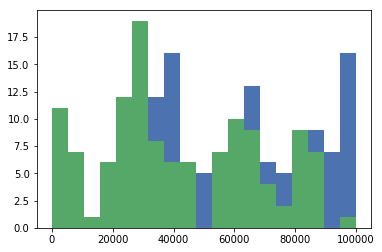

In [102]:
#check for sig with features #mileage
plt.style.use('seaborn-deep')
bins = np.linspace(0, 100000, 20)
plt.hist(df_craigslist_omaha_not_honda['odometer'], bins, label='not honda')
plt.hist(df_craigslist_omaha_honda['odometer'], bins, label='honda')
plt.show()

ford               1262
chevrolet          1023
nissan              358
dodge               347
toyota              337
honda               313
jeep                259
gmc                 243
ram                 217
chrysler            192
hyundai             187
subaru              143
kia                 112
buick               112
bmw                 104
cadillac            104
chevy               100
mazda                96
volkswagen           94
pontiac              94
lexus                60
mercedes-benz        60
acura                55
infiniti             50
audi                 36
lincoln              33
mitsubishi           31
volvo                26
rover                24
mercury              16
mini                 15
saturn               13
mercedes              8
jaguar                8
harley-davidson       5
vw                    4
fiat                  4
chev                  2
harley                2
alfa-romeo            1
porche                1
infinity        

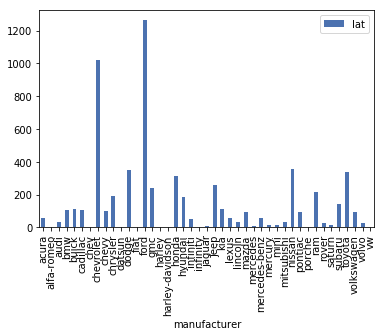

In [119]:
#counts of honda cars vs other manufacturers

df_group_by_manufacturer = df_craigslist_omaha.groupby('manufacturer').count()

df_group_by_manufacturer.plot.bar(y='lat')

omaha_counts = df_craigslist_omaha['manufacturer'].value_counts()
print(omaha_counts)

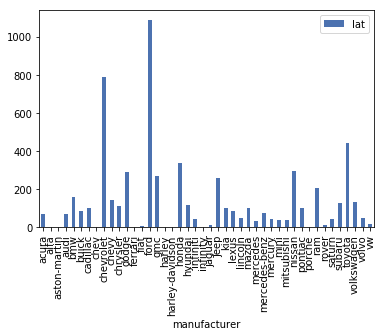

In [109]:
#make a comparable dataframe of hondas not on craigslist in Omaha

df_craigslist_not_omaha= df_craigslist_vehicles_full_clean[(df_craigslist_vehicles_full_clean.city!='omaha') & (df_craigslist_vehicles_full_clean.state_code!='NE')].sample(n=6490)

df_group_by_manufacturer_not_omaha = df_craigslist_not_omaha.groupby('manufacturer').count()

df_group_by_manufacturer_not_omaha.plot.bar(y='lat')

In [150]:
df_not_omaha_counts = df_craigslist_not_omaha['manufacturer'].value_counts()
print(df_not_omaha_counts)

ford               1086
chevrolet           789
toyota              445
honda               337
nissan              296
dodge               293
gmc                 269
jeep                257
ram                 208
bmw                 160
chevy               144
volkswagen          134
subaru              128
hyundai             115
chrysler            111
pontiac             103
mazda               103
kia                 102
cadillac            100
buick                87
lexus                84
mercedes-benz        76
acura                71
audi                 70
volvo                52
lincoln              50
infiniti             45
saturn               43
mercury              43
mitsubishi           37
mini                 37
mercedes             35
vw                   16
rover                14
jaguar               14
fiat                  9
chev                  3
harley-davidson       2
infinity              2
alfa                  1
harley                1
porche          

In [157]:
#find the number of hondas listed by city 
craigslist_honda = df_craigslist_vehicles_full_clean[df_craigslist_vehicles_full_clean.manufacturer=='honda']
craigslist_by_city_honda= craigslist_honda.groupby('city')
cl_honda = craigslist_by_city.count()

#find total number of listings by city

craigslist_total_by_city = df_craigslist_vehicles_full_clean.groupby('city')
cl_total = craigslist_total_by_city.count()  

             pricecity  priceprice
city                              
abbotsford        6579       293.0
abilene           1451        41.0
akroncanton       7848       345.0
albany            7558       539.0
albanyga           782        62.0
...                ...         ...
york              5383       253.0
youngstown        5176       163.0
yubasutter        7492       690.0
yuma              2448       120.0
zanesville        1399        64.0

[470 rows x 2 columns]


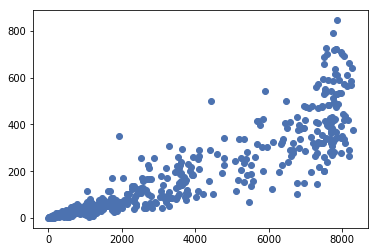

In [170]:
#plot in a scatterplot cl_total price count vs. cl_honda price count

honda_count = pd.DataFrame(cl_honda['price'])
total_count = pd.DataFrame(cl_total['price'])
data_for_graph = total_count.join(honda_count, lsuffix='city', rsuffix='price')

print(data_for_graph)

plt.scatter(x=data_for_graph['pricecity'], y=data_for_graph['priceprice'])

In [177]:
# cities with >7000 total listings and <300 honda listings

market_recs= data_for_graph[(data_for_graph['pricecity']>7000)&(data_for_graph['priceprice']<300)]
print(market_recs)
                

              pricecity  priceprice
city                               
anchorage          8183       265.0
appleton           7733       285.0
bend               7308       277.0
buffalo            7581       240.0
columbiamo         7151       195.0
detroit            7374       219.0
grandrapids        8180       292.0
greenbay           7515       202.0
lexington          7253       264.0
mcallen            7314       144.0
oklahomacity       7782       282.0
reno               7680       284.0
sarasota           7725       279.0
spokane            7968       278.0
springfield        7495       203.0
tulsa              7495       263.0
wichita            7715       271.0
